<a href="https://colab.research.google.com/github/Anishbudavi/6thSem-ML-Lab-1BM23CS401/blob/main/ML-Lab-Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM Performance:
Accuracy: 0.7
Confusion Matrix:
[[2 0]
 [3 5]]
ROC AUC Score: 0.6875

Random Forest Performance:
Accuracy: 0.6
Confusion Matrix:
[[1 1]
 [3 5]]
ROC AUC Score: 0.6875



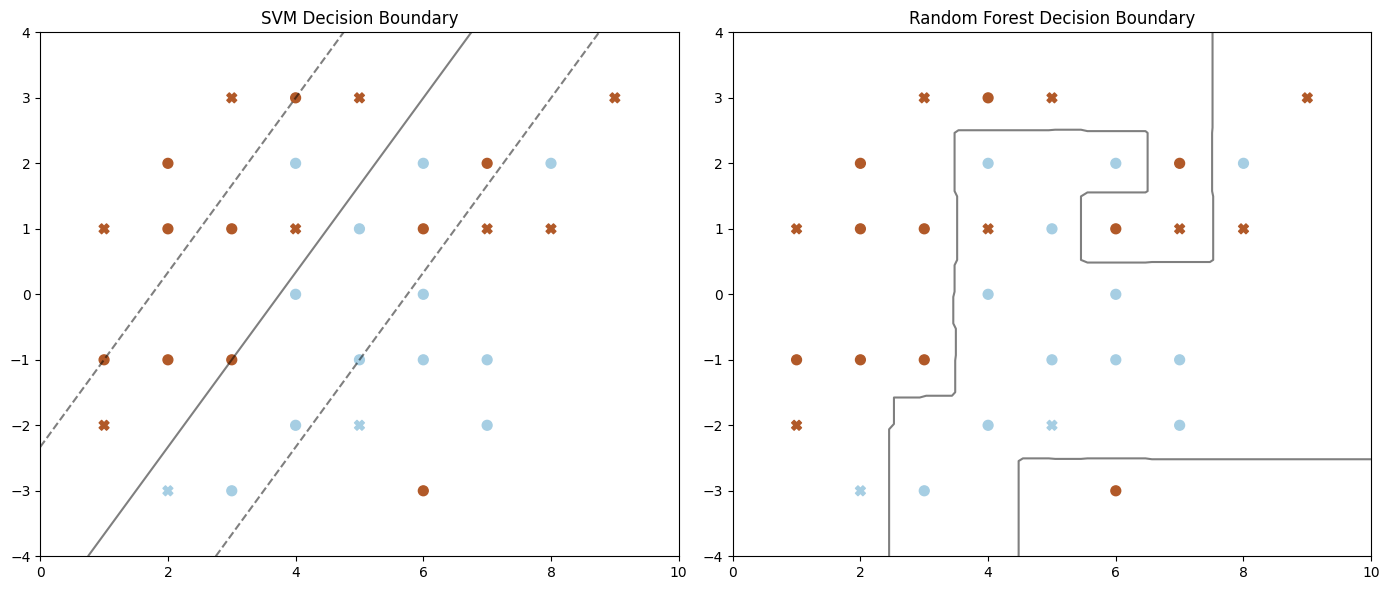

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

# Optional: Suppress matplotlib warnings about edgecolors
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Expanded dataset with more variance
X = np.array([
    [1, 1], [2, 1], [1, -1], [2, -1], [4, 0], [5, 1], [5, -1], [6, 0],
    [7, 1], [8, 1], [6, -1], [7, -1], [3, 3], [4, 3], [2, 2], [5, 3],
    [4, -2], [5, -2], [3, -3], [6, 2], [7, 2], [3, 1], [4, 2], [8, 2],
    [9, 3], [1, -2], [3, -1], [6, 1], [7, -2], [2, -3], [4, 1], [6, -3]
])
y = np.array([
    1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model
svm_clf = svm.SVC(kernel='linear', C=100, probability=True)
svm_clf.fit(X_train, y_train)

# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_clf.predict(X_test)
rf_y_pred = rf_clf.predict(X_test)

# Get probabilities for ROC AUC score
svm_y_prob = svm_clf.predict_proba(X_test)[:, 1]
rf_y_prob = rf_clf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
svm_roc_auc = roc_auc_score(y_test, svm_y_prob)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_y_prob)

# Print performance results
print("SVM Performance:")
print(f"Accuracy: {svm_accuracy}")
print(f"Confusion Matrix:\n{svm_conf_matrix}")
print(f"ROC AUC Score: {svm_roc_auc}\n")

print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")
print(f"ROC AUC Score: {rf_roc_auc}\n")

# Plot the decision boundaries
plt.figure(figsize=(14, 6))

# Plot for SVM
plt.subplot(1, 2, 1)
ax = plt.gca()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z_svm = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)

# Draw decision boundaries
ax.contour(xx, yy, Z_svm, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap=plt.cm.Paired)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=plt.cm.Paired, marker='X')

ax.set_title('SVM Decision Boundary')

# Plot for Random Forest
plt.subplot(1, 2, 2)
ax = plt.gca()
Z_rf = rf_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_rf = Z_rf.reshape(xx.shape)

# Draw contour at threshold 0.5
ax.contour(xx, yy, Z_rf, colors='k', levels=[0.5], alpha=0.5, linestyles=['-'])
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap=plt.cm.Paired)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=plt.cm.Paired, marker='X')

ax.set_title('Random Forest Decision Boundary')

plt.tight_layout()
plt.show()

